In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.random.randn(500,3)
y = 15*X[:,0] - 25*X[:,1] + 5*X[:,2] + 100 + (np.random.randn(500)*8)

## Multiple Linear Regression from scratch

In [3]:
# multiple linear regression using gradient decent
class MultiLinearRegression:
    def __init__(self, lr=0.001, epochs=1000):
        self.__lr = lr
        self.__epochs = epochs
        self.__weights = None
        self.__bias = None

    # training the model
    def fit(self, X, y):
        m = X.shape[1]
        self.__weights = np.zeros(m)
        self.__bias = 0

        # updating parameters using gradient decent
        self.__gradient_decent(X, y)

    # gradient decent
    def __gradient_decent(self, X, y):
        n = X.shape[0]
        self.__loss = []
        self.__r2score = []
        for _ in range(self.__epochs):
            y_pred = np.dot(X, self.__weights) + self.__bias
            
            self.__loss.append(self.__mse(y, y_pred))
            self.__r2score.append(self.__r2(y, y_pred))
    
            # gradients
            dw = (1/n) * np.dot(X.T, (y_pred - y))
            db = (1/n) * np.sum(y_pred - y)
    
            # update
            self.__weights -= self.__lr * dw
            self.__bias -= self.__lr * db

    # predicting target value
    def predict(self, x):
        return np.dot(x, self.__weights) + self.__bias

    # returns weights & bias
    def get_parameters(self):
        return self.__weights, self.__bias

    # plots loss and r2 score
    def plot_cost(self):
        plt.figure(figsize=(10,4))
        plt.subplot(1, 2, 1)
        plt.plot(self.__loss)
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('MSE vs Epoch')

        plt.subplot(1, 2, 2)
        plt.plot(self.__r2score)
        plt.xlabel('Epochs')
        plt.ylabel('Efficiency (R2 Score)')
        plt.title('R2-score vs Epoch')
    

    # evaluation metrices
    def evaluate(self, y_true, y_pred):
        print("Mean Absolute Error =\t", self.__mae(y_true, y_pred))
        print("Mean Squared Error =\t", self.__mse(y_true, y_pred))
        print("Root Mean Squared Error =", self.__rmse(y_true, y_pred))
        print("R2 Score =\t", self.__r2(y_true, y_pred))

    # mean absolute error
    def __mae(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += abs(y_true[i] - y_pred[i])
            return err / len(y_true)

    # mean square error
    def __mse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return err / len(y_true)

    # root mean square error
    def __rmse(self, y_true, y_pred):
        if len(y_true) == len(y_pred):
            err = 0
            for i in range(len(y_true)):
                err += (y_true[i] - y_pred[i]) ** 2
            return np.sqrt(err / len(y_true))

    # R2 score
    def __r2(self, y_true, y_pred):
        ssr = ((y_true - y_pred)** 2).sum()
        ssm = ((y_true - y_true.mean()) ** 2).sum()
        return 1 - ssr/ssm

In [16]:
xTrain, xTest = X[:400], X[400:]
yTrain, yTest = y[:400], y[400:]

In [17]:
model = MultiLinearRegression(0.1, 100)
model.fit(xTrain, yTrain)

In [18]:
model.predict([1.304835, -0.021524, 0.622629])

np.float64(123.82686494768119)

In [19]:
model.predict(xTest)

array([ 79.09402493,  25.08648448,  99.42191465, 109.12879857,
        87.39897808, 115.74485394,  68.5949987 ,  50.07947441,
       110.75114034, 101.5410743 ,  84.11211937, 104.88120636,
        44.5560292 ,  95.52847753,  89.14475863, 145.89508917,
        77.01416669,  81.8640971 , 118.64741999,  74.14307005,
        77.19651532, 108.51459134, 151.42395496,  94.17142586,
        90.45632784,  53.15800599, 172.02304633, 107.63466998,
       102.12173703, 123.32677677,  70.42871227, 107.90256262,
       101.72103126,  99.4128823 , 131.65897548,  48.61755601,
       107.87168607, 142.19171136,  95.22940981,  93.71828421,
       112.52899777, 118.60372015, 133.17070196, 135.66710301,
        91.67875988, 105.4607379 , 134.45653161, 110.18201216,
        98.3110733 , 117.0332316 ,  75.51973741,  42.12227181,
       110.45542163,  90.5842721 , 104.27281274, 115.46204311,
        75.2658791 , 102.77861429,  81.49049008,  63.34387723,
        69.86700307,  95.50348042, 116.08413025,  59.49

In [20]:
model.evaluate(yTest, model.predict(xTest))

Mean Absolute Error =	 7.202563150390667
Mean Squared Error =	 78.1187307490443
Root Mean Squared Error = 8.838480115327766
R2 Score =	 0.9037063893578626


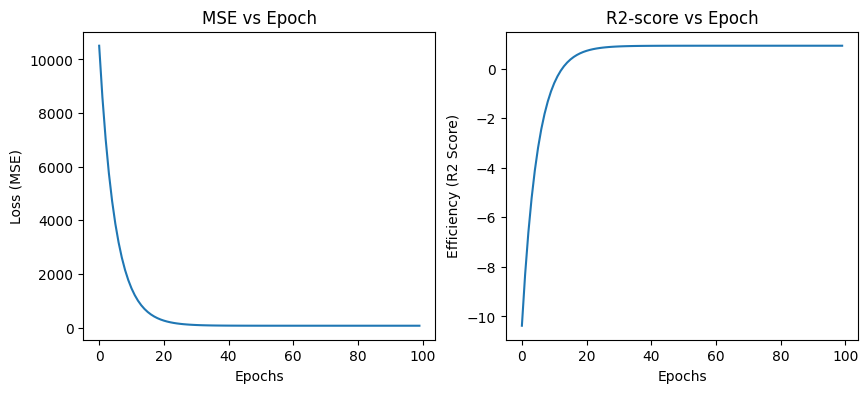

In [21]:
model.plot_cost()

## Comparing with scikit-learn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

In [24]:
print(f"Sklearn model:\t\tm = {lr.coef_}\t b = {lr.intercept_}")
print(f"Model from Scrach:\tm = {model.get_parameters()[0]}\t b = {model.get_parameters()[1]}")

Sklearn model:		m = [ 15.39320931 -24.74222913   4.98164678]	 b = 100.11412851630448
Model from Scrach:	m = [ 15.39154054 -24.73876651   4.98102806]	 b = 100.10963441743539


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Sklearn Model:")
print("Mean Absolute Error =\t", mean_absolute_error(yTest, model.predict(xTest)))
print("Mean Squared Error =\t", mean_squared_error(yTest, model.predict(xTest)))
print("Root Mean Squared Error =", np.sqrt(mean_squared_error(yTest, model.predict(xTest))))
print("R2 Score =\t", r2_score(yTest, model.predict(xTest)))

Sklearn Model:
Mean Absolute Error =	 7.202563150390664
Mean Squared Error =	 78.11873074904432
Root Mean Squared Error = 8.838480115327766
R2 Score =	 0.9037063893578626


In [26]:
print("Model from Scrach:")
model.evaluate(yTest, model.predict(xTest))

Model from Scrach:
Mean Absolute Error =	 7.202563150390667
Mean Squared Error =	 78.1187307490443
Root Mean Squared Error = 8.838480115327766
R2 Score =	 0.9037063893578626
